In [37]:
import numpy as np
import copy
from astropy.io import fits
from importlib import reload
import matplotlib.pyplot as plt
plt.rcParams['image.origin']='lower'
import os
from pathlib import Path
from datetime import datetime
date = int(datetime.today().strftime('%Y%m%d'))

import proper
proper.use_ffti = False
proper.use_fftw = False

import roman_phasec_proper as phasec
phasec.copy_here()
import falco

from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) # just making the notebook cells wider

falco_dir = Path(os.path.dirname(falco.__file__))
roman_dir = Path(os.path.dirname(falco_dir))/'roman'
flatmap_dir = roman_dir/'flatmaps'

import misc
from imshows import *

In [40]:
date = 20230725
mp = misc.load_pickle(f'results/hlc_575_test_mp_{date}.pkl')
out = misc.load_pickle(f'results/hlc_575_test_out_{date}.pkl')

In [45]:
out.Nitr

20

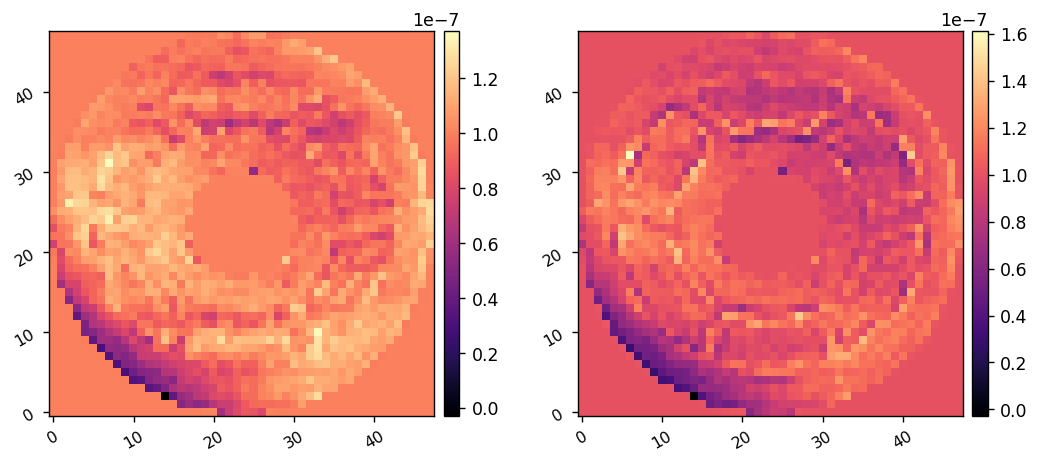

In [46]:

mp.dm1.V = out.dm1.Vall[:,:,out.Nitr]
mp.dm2.V = out.dm2.Vall[:,:,out.Nitr]

dm1_m = (mp.dm1.V + mp.dm1.biasMap + 50)*mp.dm1.VtoH
dm2_m = (mp.dm2.V + mp.dm2.biasMap + 50)*mp.dm2.VtoH
imshow2(dm1_m, dm2_m, )

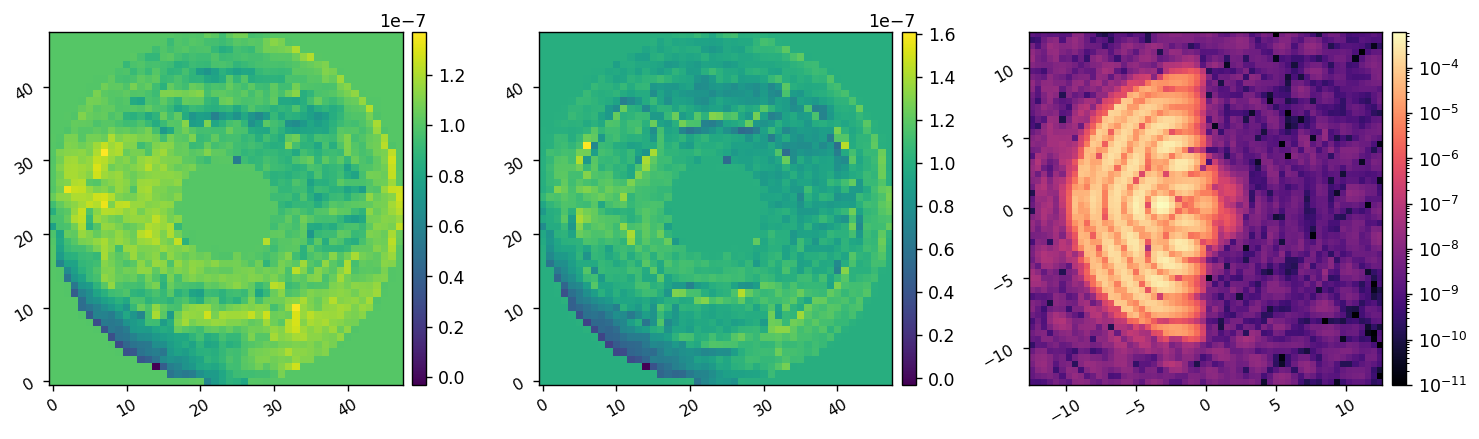

In [47]:
falco_image = falco.get_summed_image(mp)
imshow3(dm1_m, dm2_m, falco_image, 
        cmap1='viridis', cmap2='viridis',
        pxscl3=1/mp.Fend.res, lognorm3=True, vmin3=1e-11)

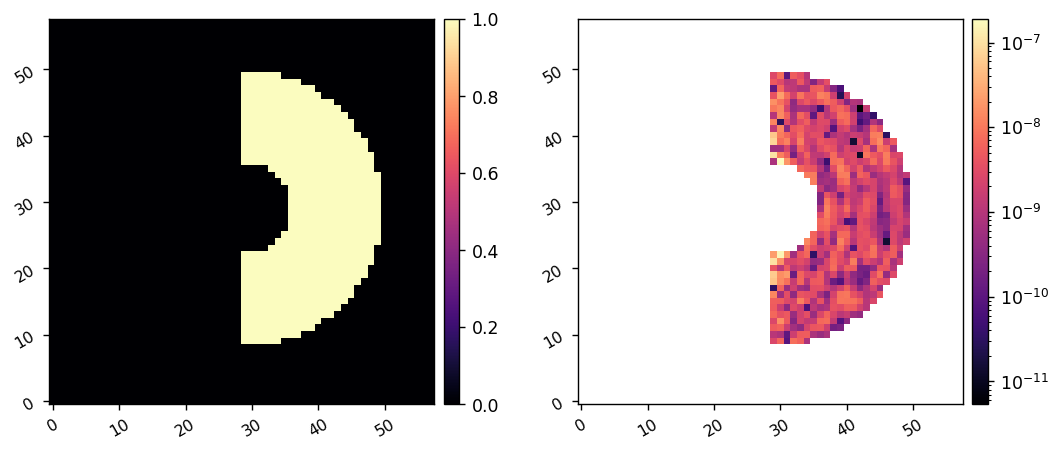

4.595373190418758e-09


In [64]:
imshow2(mp.Fend.score.maskBool, mp.Fend.score.maskBool*falco_image, lognorm2=True)
print(np.mean(falco_image[mp.Fend.score.maskBool]))

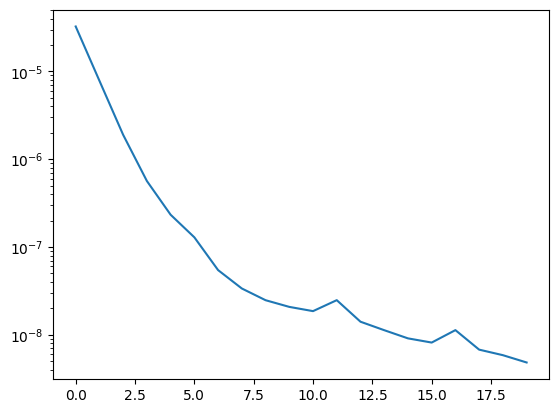

In [68]:
x = np.arange(0,out.Nitr)
plt.semilogy(x, out.IrawScoreHist[:-1])